In [57]:
# Importation des bibliothèques utilisées pour cet exemple
import matplotlib.pyplot as plt
import numpy as np
import imageio
import skimage

Profitons du fais que l'oeil humain a généralement moins de sensibilité à la couleur bleue pour créer une image mystère contenant une photo de chaton.

In [58]:
# Lecture d'un ficher image (utilisé l'image 1)
# Utilisez imageio.imread
img0 = imageio.imread("image_00.jpg")

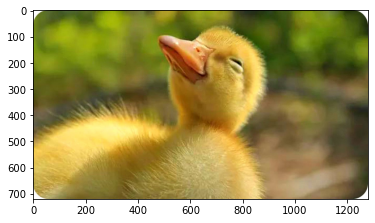

In [59]:
# Affichage d'une image : Utilisez matplotlib (plt.imshow() et plt.show())
plt.imshow(img0)
plt.show()

In [60]:
# Affichage de quelques informations au sujet de l'image (utilisez les attributes de la classe ndarray à laquelle appartient la variable img1)
print(img0.dtype)
print(img0.shape)
print(img0[0])
print(img0[1])
print(img0[2])
print(img0[0].mean())
print(img0[1].mean())
print(img0[2].mean())



uint8
(720, 1280, 3)
[[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [255 255 255]
 [255 255 255]
 [255 255 255]]
[[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [255 255 255]
 [255 255 255]
 [255 255 255]]
[[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [255 255 255]
 [255 255 255]
 [255 255 255]]
95.44583333333334
93.60052083333333
92.63723958333334


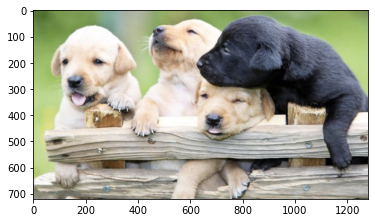

uint8
(720, 1280, 3)


In [61]:
# Répéter pour les deux autres images
img1 = imageio.imread("image_01.jpg")
plt.imshow(img1)
plt.show()
print(img1.dtype)
print(img1.shape)


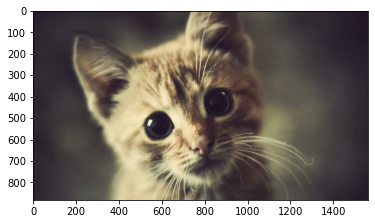

uint8
(882, 1563, 3)


In [62]:
img2 = imageio.imread("image_02.jpg")
plt.imshow(img2)
plt.show()
print(img2.dtype)
print(img2.shape)


In [63]:
# Calculer la dimension minimale parmi les 3 images en X et en Y (utiliser la méthode .shape, et la fonction min)
print("min X", min(min(img0.shape[0], img1.shape[0]), img2.shape[0]))
print("min Y", min(min(img0.shape[1], img1.shape[1]), img2.shape[1]))

min X 720
min Y 1280


(720, 1280, 3)


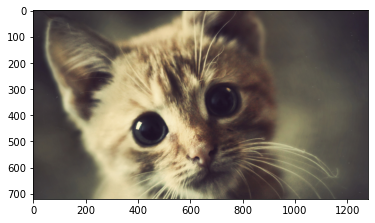

In [79]:
# Rogner les images selon la dimension calculée plus haut
lim_inf_x = (img2.shape[0] - 720) // 2
lim_sup_x = img2.shape[0] - lim_inf_x
lim_inf_y = (img2.shape[1] - 1280) // 2
lim_sup_y = img2.shape[1] - lim_inf_y -1
r_img2 = img2[lim_inf_x:lim_sup_x, lim_inf_y:lim_sup_y]
print(r_img2.shape)
plt.imshow(r_img2)
plt.show()

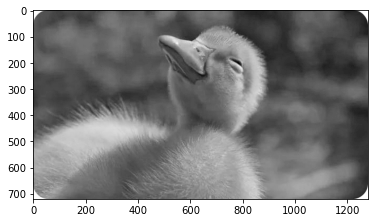

In [87]:
# Convertir les images RGB en niveau de gris (moyenner tous les canaux). Utiliser la méthode .mean et le bon axe
img0_gray = np.mean(img0, axis=2)
plt.imshow(img0_gray, cmap="gray")
plt.show()
img1_gray = np.mean(img1, axis=2)
img2_gray = np.mean(r_img2, axis=2)

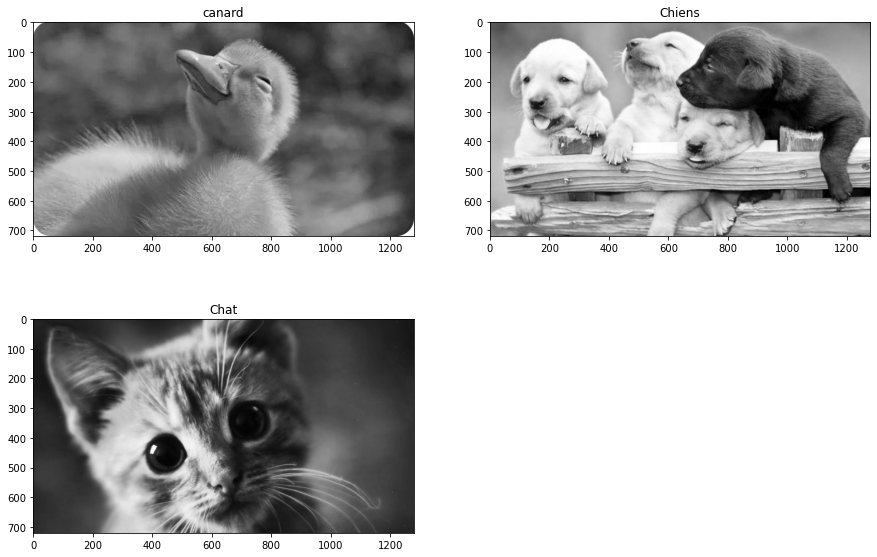

In [96]:
# Afficher les trois images dans une meme figure
# Note : utilisez plt.subplot
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(img0_gray, cmap="gray")
plt.title("canard")
plt.subplot(2,2,2)
plt.title("Chiens")

plt.imshow(img1_gray, cmap="gray")
plt.subplot(2,2,3)
plt.title("Chat")

plt.imshow(img2_gray, cmap="gray")
plt.show()

In [67]:
# Affichez les images en niveaux de gris (utilisez l'argument cmap='gray')
# fait en haut

In [98]:
# Normaliser les intensités entre 0 et 1 pour les images 1 et 2, et entre 0 et 0.2 pour l'image 3.
# Utiliser: np.max

n_img0 = img0_gray / img0_gray.max()
n_img1 = img1_gray / img1_gray.max()
n_img2 = img2_gray / img2_gray.max() * 0.2



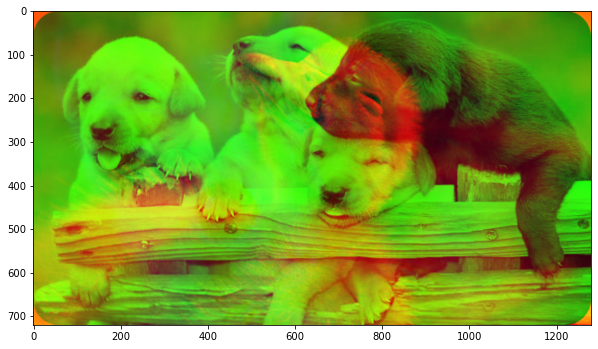

In [106]:
# Combiner les images (utilisé np.stack(..., axis=2)) pour créer 
montage = np.stack([n_img0, n_img1, n_img2], axis=2)

plt.figure(figsize=(10,10))
plt.imshow(montage)
plt.show()

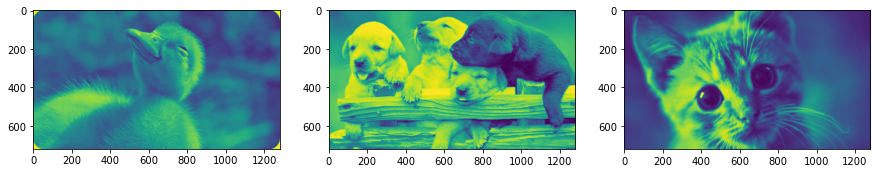

In [113]:
# Afficher les 3 canaux couleurs (indexation de l'axe 2)

plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(montage[0:-1,:,0])
plt.subplot(132)
plt.imshow(montage[:,:, 1])
plt.subplot(133)
plt.imshow(montage[..., 2])
plt.show()

In [114]:
# Entregistrer l'image mytère sur disque sous format jpg

imageio.imwrite("montage.jpg", montage, "jpg")

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [116]:
# Modifier le format des pixels de l'image ne plus recevoir l'avertissement précédent. 
# * Utiliser la méthode .astype() de la classe ndarray, et le format de donnée np.uint8.
# N'oublier pas d'ajuster l'étendue des valeurs pour éviter la saturation de votre image.

# Enregistrer cette image sous un autre nom

imageio.imwrite("montage_ex.jpg", (montage * 255).astype(np.uint8))


# Suggestion de modification
* Au lieu de rogner les images, utiliser les fonctions disponibles dans le module `skimage.transform` pour redimensionner les images avant de les combiner
